# PROBLEM STATEMENT:
# IMPLEMENT THE LINEAR REGRESSION MODEL TO PREDICT THE PRICES OF HOUSES BASED ON THEIR SQUARE FOOTAGE AND NUMBER OF BEDROOMS AND BATHROOMS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# LOADING THE DATASET


In [2]:
from google.colab import files
uploaded=files.upload()

Saving train.csv to train.csv


In [3]:
from google.colab import files
uploaded=files.upload()

Saving test.csv to test.csv


In [4]:
train=pd.read_csv("train.csv")

In [5]:
test=pd.read_csv("test.csv")

In [6]:
train,test

(        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0        1          60       RL         65.0     8450   Pave   NaN      Reg   
 1        2          20       RL         80.0     9600   Pave   NaN      Reg   
 2        3          60       RL         68.0    11250   Pave   NaN      IR1   
 3        4          70       RL         60.0     9550   Pave   NaN      IR1   
 4        5          60       RL         84.0    14260   Pave   NaN      IR1   
 ...    ...         ...      ...          ...      ...    ...   ...      ...   
 1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
 1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
 1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
 1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
 1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   
 
      LandContour Utilities  ... PoolA

In [7]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# DATA PREPROCESSING
    

In [8]:
train.isnull() #checcks for the null value

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [9]:
train.notnull() #check for the notnull that means value exists

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,True,True,True,True,True,True,False,True,True,True,...,True,False,False,False,True,True,True,True,True,True
1,True,True,True,True,True,True,False,True,True,True,...,True,False,False,False,True,True,True,True,True,True
2,True,True,True,True,True,True,False,True,True,True,...,True,False,False,False,True,True,True,True,True,True
3,True,True,True,True,True,True,False,True,True,True,...,True,False,False,False,True,True,True,True,True,True
4,True,True,True,True,True,True,False,True,True,True,...,True,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,True,True,True,True,True,True,False,True,True,True,...,True,False,False,False,True,True,True,True,True,True
1456,True,True,True,True,True,True,False,True,True,True,...,True,False,True,False,True,True,True,True,True,True
1457,True,True,True,True,True,True,False,True,True,True,...,True,False,True,True,True,True,True,True,True,True
1458,True,True,True,True,True,True,False,True,True,True,...,True,False,False,False,True,True,True,True,True,True


In [10]:
train.fillna(1)#fills the missing value

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,1,Reg,Lvl,AllPub,...,0,1,1,1,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,1,Reg,Lvl,AllPub,...,0,1,1,1,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,1,IR1,Lvl,AllPub,...,0,1,1,1,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,1,IR1,Lvl,AllPub,...,0,1,1,1,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,1,IR1,Lvl,AllPub,...,0,1,1,1,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,1,Reg,Lvl,AllPub,...,0,1,1,1,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,1,Reg,Lvl,AllPub,...,0,1,MnPrv,1,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,1,Reg,Lvl,AllPub,...,0,1,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,1,Reg,Lvl,AllPub,...,0,1,1,1,0,4,2010,WD,Normal,142125


In [11]:
train.dtypes #determines the datatype of the column names

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


In [12]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
features=['GrLivArea','BedroomAbvGr','FullBath'
]
target='SalePrice'

Drop the missing value

In [14]:
df=train[features+[target]].dropna()

In [15]:
x=df[features]
y=df[target]

# Split the training and validation phase
80% Training
20% Testing

In [16]:
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# MODEL TRAINING

In [17]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [18]:
y_pred=model.predict(x_test)

# Exploratory data analysis

In [19]:
sns.set(style="darkgrid",palette='pastel')
plt.figure(figsize=(16,12))

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

Text(0.5, 1.0, 'saleprice distribution  ')

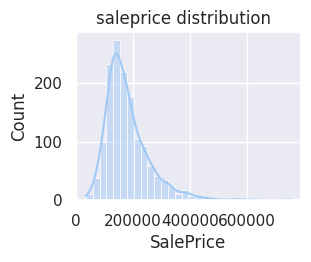

In [20]:
plt.subplot(2,2,1)
sns.histplot(df['SalePrice'],bins=30,kde=True)
plt.title('saleprice distribution  ')

Text(0.5, 1.0, 'price distribution based on square footage')

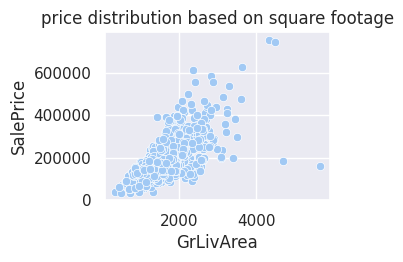

In [21]:
plt.subplot(2,2,3)
# Use the 'data' parameter for the DataFrame and 'x' and 'y' for the column names
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice')
plt.title('price distribution based on square footage')


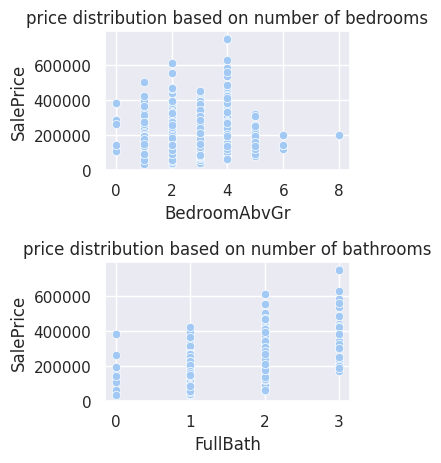

In [22]:
# Add scatter plots for BedroomAbvGr vs SalePrice and FullBath vs SalePrice

plt.subplot(2, 2, 2) # Create a new subplot at position 2,2,2
sns.scatterplot(data=df, x='BedroomAbvGr', y='SalePrice')
plt.title('price distribution based on number of bedrooms')

plt.subplot(2, 2, 4) # Create a new subplot at position 2,2,4
sns.scatterplot(data=df, x='FullBath', y='SalePrice')
plt.title('price distribution based on number of bathrooms')

plt.tight_layout() # Adjust layout to prevent overlapping titles and labels
plt.show() # Display the plots

# Evaluate the model

In [23]:
from sklearn.metrics import mean_squared_error,r2_score,f1_score
mse=mean_squared_error(y_test,y_pred),
rscore=r2_score(y_test,y_pred)
print(mse,rscore)

(2806426667.247853,) 0.6341189942328371


 # Predict on test.csv

In [24]:
test=pd.read_csv("test.csv")
test_df_clean=test[features].dropna()
test_predictions=model.predict(test_df_clean)


# Prediction

*  train.csv do not have the target variable
*  keep the relevant column and remove the missing column
*   Tained linear regression model predict the house price




In [25]:
print(pd.DataFrame({'GrLivArea':test_df_clean['GrLivArea'],'BedroomAbVgr':test_df_clean['BedroomAbvGr'],'FullBath':test_df_clean['FullBath'],'PredictedPrice':test_predictions}).head(10))

   GrLivArea  BedroomAbVgr  FullBath  PredictedPrice
0        896             2         1   122173.313104
1       1329             3         1   140561.538683
2       1629             3         2   201783.754896
3       1604             3         2   199183.097221
4       1280             2         2   192133.739106
5       1655             3         2   204488.438878
6       1187             3         2   155804.127196
7       1465             3         2   184723.440546
8       1341             2         1   168465.019725
9        882             2         1   120716.944806


In [26]:
import pickle
with open ('house_price_model.pkl','wb') as file:
  pickle.dump(model,file)

In [27]:
print(type(model))

<class 'sklearn.linear_model._base.LinearRegression'>


In [28]:
print(model.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [29]:
from google.colab import files
files.download('house_price_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>